In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import altair as alt
import vega3
# to use with Jupyter notebook (not JupyterLab) run the following
alt.renderers.enable('jupyterlab', embed_options={'renderer': 'svg'})

RendererRegistry.enable('jupyterlab')

In [23]:
bchunk = pd.read_csv('/home/marnec/Projects/CAID/test/new-disprot-linker_chunk_scores.csv', index_col=[0]).mean().to_frame().transpose()
bchain = pd.read_csv('/home/marnec/Projects/CAID/test/new-disprot-linker_chunk_scores.csv', index_col=[0]).mean().to_frame().transpose()
bcons = pd.read_csv('/home/marnec/Projects/CAID/test/new-disprot-linker_cons_scores.csv', index_col=[0]).mean().to_frame().transpose()
bs = pd.concat([bchunk, bchain, bcons], axis=0, sort=False)
bs.index = ['chunk', 'chain', 'cons']
bs.round(3)

,BAc,FPR,F1s,F1s_n,MCC,Pre,Pre_n,Rec,Rec_n,BAc_avg,...,Pre_std,Pre_n_avg,Pre_n_std,Rec_avg,Rec_std,Rec_n_avg,Rec_n_std,AUC_PRC,AUC_ROC,Cov
chunk,0.566,0.067,0.198,0.933,0.131,0.198,0.933,0.198,0.933,0.5,...,0.118,0.112,0.052,0.118,0.112,0.118,0.112,NaN,NaN,NaN
chain,0.566,0.067,0.198,0.933,0.131,0.198,0.933,0.198,0.933,0.5,...,0.118,0.112,0.052,0.118,0.112,0.118,0.112,NaN,NaN,NaN
cons,NaN,0.856,0.000,0.252,NaN,0.000,1.000,NaN,0.144,NaN,...,0.000,0.211,NaN,0.000,0.000,NaN,0.164,NaN,NaN,1.0


In [24]:
df = pd.read_csv('/home/marnec/Projects/CAID/test/new-disprot-linker_simple_redefScores.csv', index_col=[0])
df = df.append(bs, sort=False).round(3)
df

,BAc,FPR,F1s,F1s_n,MCC,Pre,Pre_n,Rec,Rec_n,BAc_avg,...,Pre_std,Pre_n_avg,Pre_n_std,Rec_avg,Rec_std,Rec_n_avg,Rec_n_std,Cov,AUC_PRC,AUC_ROC
D021_tosatto_mobidblite,0.738,0.364,0.292,0.770,0.270,0.177,0.977,0.839,0.636,0.723,...,0.247,0.159,0.239,0.238,0.043,0.271,0.204,1.0,NaN,NaN
D027_xu_aucpred_no_profile,0.727,0.344,0.271,0.784,0.250,0.163,0.975,0.799,0.656,0.681,...,0.246,0.179,0.245,0.208,0.058,0.349,0.209,1.0,NaN,NaN
D018_tosatto_espritzd,0.693,0.382,0.243,0.755,0.210,0.144,0.970,0.769,0.618,0.596,...,0.214,0.329,0.223,0.159,0.053,0.444,0.324,1.0,NaN,NaN
D004_dosztanyi_iupred2as,0.757,0.327,0.293,0.798,0.285,0.177,0.980,0.840,0.673,0.690,...,0.266,0.152,0.266,0.229,0.034,0.395,0.194,1.0,NaN,NaN
D008_galzitskaya_isunstruct,0.740,0.343,0.278,0.786,0.264,0.167,0.978,0.823,0.657,0.663,...,0.261,0.188,0.278,0.222,0.049,0.394,0.226,1.0,NaN,NaN
D002_cheng_predisorder,0.759,0.300,0.303,0.817,0.292,0.186,0.979,0.818,0.700,0.702,...,0.278,0.151,0.286,0.255,0.036,0.373,0.202,1.0,NaN,NaN
D009_gibson_globplot,0.654,0.544,0.204,0.622,0.166,0.116,0.973,0.851,0.456,0.659,...,0.219,0.167,0.186,0.192,0.051,0.275,0.193,1.0,NaN,NaN
D031_esnouf_jronn,0.741,0.340,0.280,0.788,0.265,0.168,0.978,0.822,0.660,0.675,...,0.270,0.170,0.276,0.258,0.045,0.398,0.216,1.0,NaN,NaN
D011_jones_disopred3_disorder,0.728,0.336,0.273,0.790,0.252,0.165,0.974,0.792,0.664,0.688,...,0.277,0.200,0.286,0.298,0.055,0.410,0.257,1.0,NaN,NaN
D017_russel_disembl_465,0.664,0.395,0.225,0.743,0.178,0.133,0.963,0.724,0.605,0.630,...,0.198,0.140,0.174,0.171,0.061,0.293,0.165,1.0,NaN,NaN


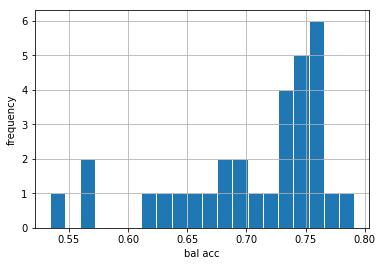

In [25]:
ax = df['BAc'].hist(bins=20, edgecolor='w')
ax.set_xlabel('bal acc')
ax.set_ylabel('frequency');

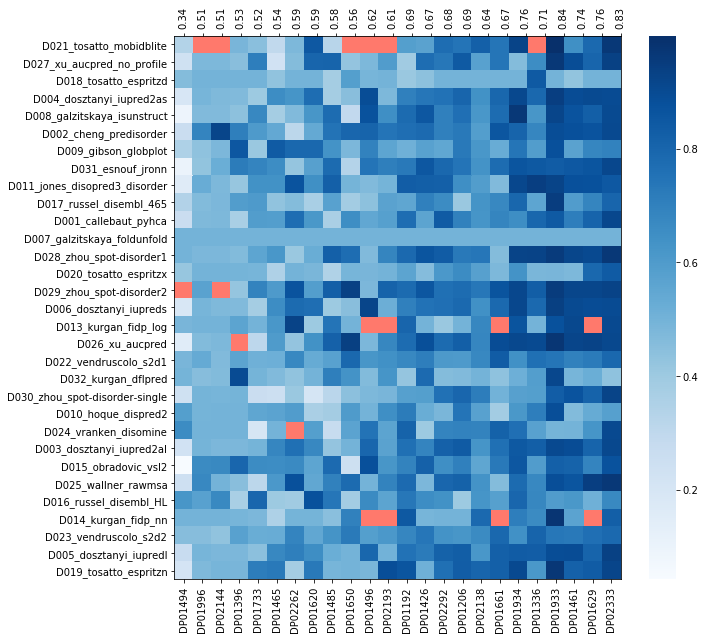

In [26]:
pi = pd.read_csv('/home/marnec/Projects/CAID/test/new-disprot-linker_simple_perInstanceScores.csv', header=[0], index_col=[0, 1])
piba = pi.xs('bal_acc', level=1).reindex(pi.mean().sort_values().index, axis=1)
fix, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(piba, cmap='Blues', ax=ax)
ax.axes.get_yaxis().get_label().set_visible(False)
ax.set_facecolor('xkcd:salmon')

ax2 = ax.twiny()
ax2tick_location = ax.xaxis.get_ticklocs() #Get the tick locations in data coordinates as a numpy array
ax2.set_xticks(ax2tick_location)
ax2.set_xticklabels(piba.mean().round(2));
ax2.tick_params(axis='x', rotation=90)

In [92]:
pibaf = piba.reset_index().melt(id_vars=['0'])
pibaf.columns = ['method', 'target', 'accuracy']
pibaf.head()

,method,target,accuracy
0,D021_tosatto_mobidblite,DP01494,0.341
1,D027_xu_aucpred_no_profile,DP01494,0.240
2,D018_tosatto_espritzd,DP01494,0.463
3,D004_dosztanyi_iupred2as,DP01494,0.196
4,D008_galzitskaya_isunstruct,DP01494,0.091


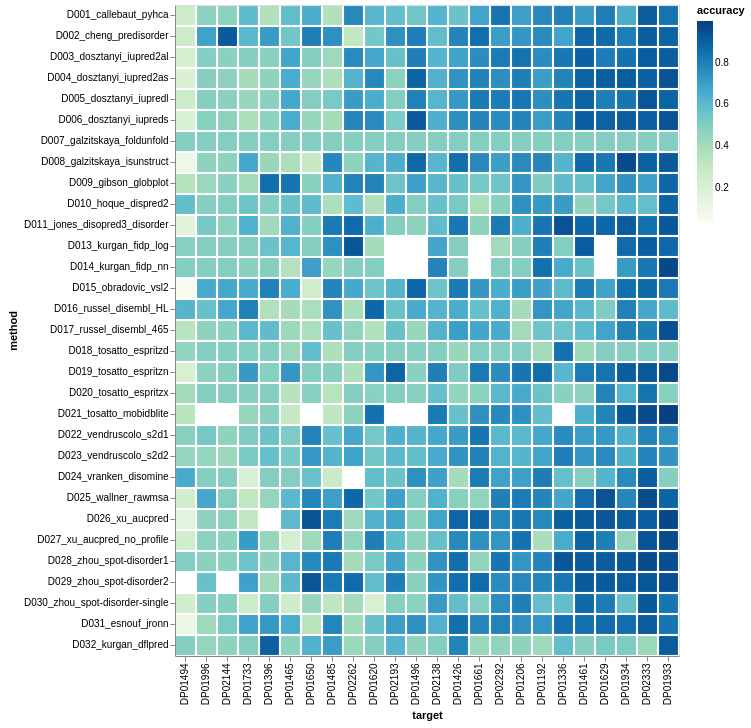

In [117]:
interval = alt.selection_interval()

Chart(pibaf).mark_rect().encode(
    x=alt.X("target", sort=alt.EncodingSortField(
            field="accuracy",  # The field to use for the sort
            op="mean",  # The operation to run on the field prior to sorting
            order="ascending"  # The order to sort in),
    )),
    y=alt.Y("method"),
    color=alt.Color('accuracy', scale=alt.Scale(scheme='greenblue'))
)

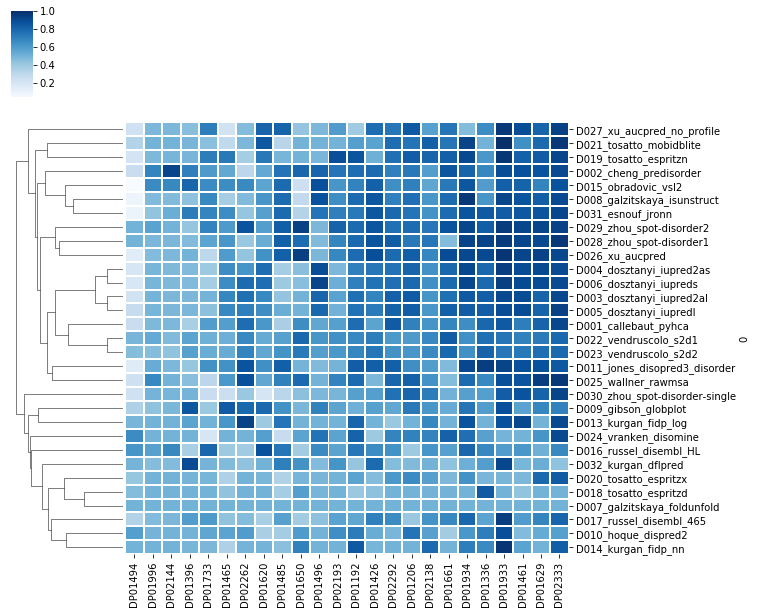

In [88]:
pibaf = pi.xs('bal_acc', level=1).reindex(pi.mean().sort_values().index, axis=1).fillna(0.5)
ax = sns.clustermap(pibaf, cmap="Blues", col_cluster=False, edgecolor='w', linewidth=1);

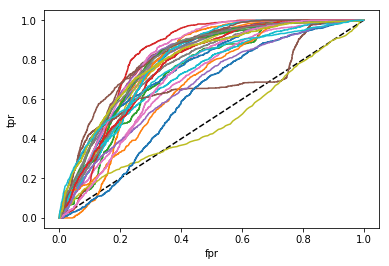

In [121]:
def parse_curve_file(curve_file):
    with open(curve_file) as f:
        for line in f:
            code, _, auc, *points = line.split()
            auc = float(auc)
            x, y, thr = zip(*map(lambda s: map(float, s.split(',')), points))

            yield code, auc, np.array(x), np.array(y), np.array(thr)

# initialize a figure and an ax            
fig, ax = plt.subplots()
# plot diagonal
ax.plot([0, 1], [0, 1], linestyle='--', color='k')

# plot all curves in evaluation file
for curve_data in parse_curve_file('/home/marnec/Projects/CAID/test/new-disprot-linker_simple_rocPoints.txt'):
    code, auc_roc, x, y, thr = curve_data
    ax.plot(x, y, label='{} AUC: {:.2f}'.format(code, auc_roc))

# plot baseline curve from its own file
for curve_data in parse_curve_file('/home/marnec/Projects/CAID/baseline/len-negs_new-disprot-linker_cons_rocPoints.txt'):
    code, auc_roc, x, y, thr = curve_data
    ax.plot(x, y, label='{} AUC: {:.2f}'.format(code, auc_roc))

ax.set_xlabel('fpr')
ax.set_ylabel('tpr');

In [150]:
# alt.data_transformers.enable('csv')
table = []
for label, auc, xs, ys, thrs in parse_curve_file('/home/marnec/Projects/CAID/test/new-disprot-linker_simple_rocPoints.txt'):
    for x, y in zip(xs, ys):
        table.append([label, x, y])

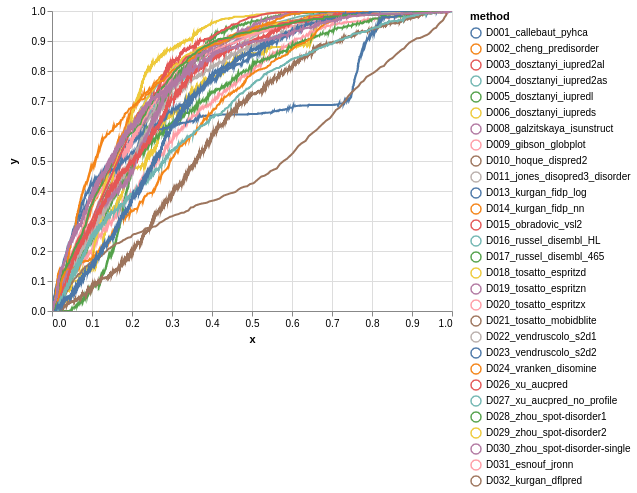

In [152]:
alt.Chart(pd.DataFrame(table, columns=['method', 'x', 'y'])).mark_line().encode(
    x='x',
    y='y',
    color='method'
)


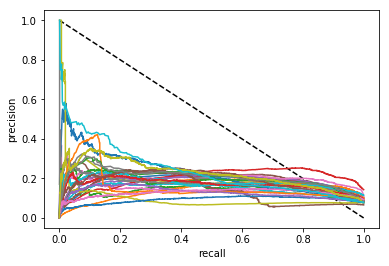

In [147]:
# initialize a figure and an ax            
fig, ax = plt.subplots()
# plot diagonal
ax.plot([0, 1], [1, 0], linestyle='--', color='k')

# plot all curves in evaluation file
for i, curve_data in enumerate(parse_curve_file('/home/marnec/Projects/CAID/test/new-disprot-linker_simple_prcPoints.txt')):
    code, auc_prc, x, y, thr = curve_data
    ax.plot(x, y, label='{} AUC: {:.2f}'.format(code, auc_prc))

# plot baseline curve from its own file
for curve_data in parse_curve_file('/home/marnec/Projects/CAID/baseline/len-negs_new-disprot-linker_cons_prcPoints.txt'):
    code, auc_prc, x, y, thr = curve_data
    ax.plot(x, y, label='{} AUC: {:.2f}'.format(code, auc_prc))

ax.set_xlabel('recall')
ax.set_ylabel('precision');

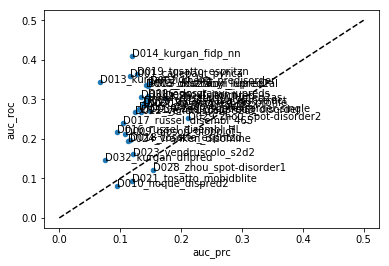

In [11]:
roc = list()
prc = list()
for roc_data in parse_curve_file('/home/marnec/Projects/CAID/test/new-disprot-linker_simple_rocPoints.txt'):
    code, aucs, x, y, thr = roc_data
    auc_roc = auc(x[x<=0.2], y[x<=0.2])
    auc_roc /= 0.2
    roc.append([code, auc_roc])
    
for prc_data in parse_curve_file('/home/marnec/Projects/CAID/test/new-disprot-linker_simple_prcPoints.txt'):
    code, aucs, x, y, thr = prc_data
    auc_prc = auc(x[x>=0.8], y[x>=0.8])
    auc_prc /= 0.2
    prc.append([code, auc_prc])

roc = pd.DataFrame(roc, columns=['code', 'auc_roc']).set_index('code')
prc = pd.DataFrame(prc, columns=['code', 'auc_prc']).set_index('code')

sc = pd.concat([prc, roc], axis=1)
ax = sc.plot.scatter(x='auc_prc', y='auc_roc')

for k, v in sc.iterrows():
    ax.annotate(k, v)
    
ax = ax.plot([0, 0.5], [0, 0.5], color='k', linestyle='--')

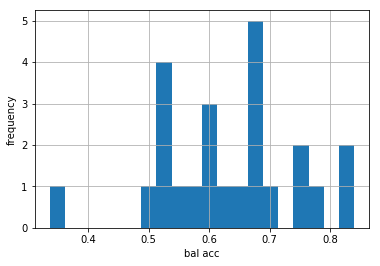

In [12]:
ax = pi.xs('bal_acc', level=1).mean().hist(bins=20)
ax.set_xlabel('bal acc')
ax.set_ylabel('frequency');